# Vectorisation Bag of Words (BoW) avec CountVectorizer et classification avec MultinomialNB

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,zrkrwmgseetfegaozv kovx vh,0,0,0,1
1,Comment puis-je me rendre de l'aéroport de CHA...,1,0,0,0
2,4f3;S0`HsL# hL8ydlwlM2cK7=,0,0,0,1
3,"u*]P\UsbAr,CoDnDdr*-GKN(0O",0,0,0,1
4,J'aimerais connaître le chemin pour aller de S...,1,0,0,0
...,...,...,...,...,...
1302960,Il a prétendu être mon ami.,0,0,1,0
1302961,I am planning a trip from saint paul les dax t...,0,1,0,0
1302962,Go from the train station of Loches to Venarey...,0,1,0,0
1302963,Je souhaiterais aller à verneuil sur serre dep...,1,0,0,0


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


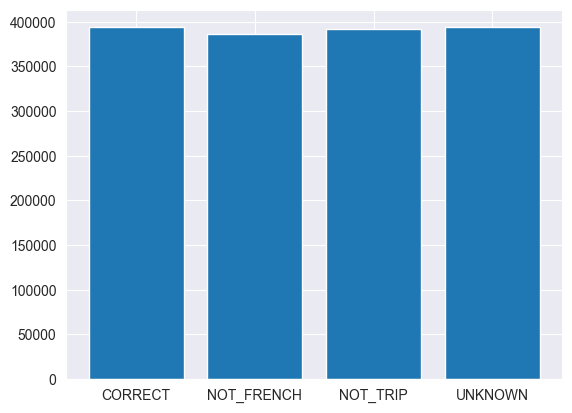

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Suppression des stop words

In [4]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Eliott
[nltk_data]     Clavier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('french'))

In [6]:
import re

def remove_stop_words(text: str):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize the text
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [7]:
dataset['text'] = dataset['text'].apply(remove_stop_words)

# Split du dataset en train, test et validation

In [8]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(521185,) (65148,) (65149,)
(521185, 4) (65148, 4) (65149, 4)


In [9]:
X_train.values

array(['show the way to saarbrücken sarrebruck from the train station of creil',
       'comment partir lardin saint lazare',
       'i looking for a way to arrive at the central square of rosporden',
       ..., 'no rights reserved', 'er ist ein schlauer junge',
       'cfqfhk bg toddy ed8 whnd'], dtype=object)

# Exemple d'utilisation de CountVectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<521185x407788 sparse matrix of type '<class 'numpy.int64'>'
	with 3437877 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [11]:
v.get_feature_names_out()[100000:100050]

array(['eeypakk', 'eeypnhsiiu', 'eez', 'eezaivlgxwtgscl', 'eezawkbp',
       'eezc', 'eezcwosj', 'eezczhynbqmz', 'eezdjgkezaubw', 'eezew',
       'eezf4djo', 'eezfbudbq', 'eezgiq', 'eezhemd', 'eezhnky',
       'eezlesqo', 'eezo', 'eezoy', 'eezp', 'eezpbedwnkovgmpybz',
       'eezsjfc', 'eezsy', 'eezuwdwmzi', 'eezxp', 'eezyuh', 'ef', 'ef0',
       'ef0o9', 'ef0ph', 'ef1', 'ef1ezq', 'ef1iyj', 'ef2', 'ef20',
       'ef2cfk76ou', 'ef2g', 'ef2qyhp', 'ef3', 'ef33zq', 'ef4', 'ef40lju',
       'ef4e2o', 'ef5', 'ef6', 'ef6c', 'ef6p31awqud', 'ef7', 'ef7a',
       'ef7lkoc', 'ef7s'], dtype=object)

In [12]:
# Number of identified features
v.get_feature_names_out().shape

(407788,)

In [13]:
v = CountVectorizer()

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<454735x80687 sparse matrix of type '<class 'numpy.int64'>'
	with 3552965 stored elements in Compressed Sparse Row format>

In [14]:
# Number of identified features
v.get_feature_names_out().shape

(80687,)

In [15]:
v.get_feature_names_out()[30000:30050]

array(['genetica', 'genetically', 'genetischen', 'genetistas', 'geneva',
       'genevieve', 'genevievre', 'geneviève', 'genf', 'gengiva', 'geni',
       'genia', 'genial', 'genialste', 'genie', 'genieren', 'genierte',
       'geniest', 'genieße', 'genießen', 'genießt', 'genio', 'genios',
       'genitori', 'genius', 'genji', 'genna', 'gennifer', 'genoa',
       'genocide', 'genocidio', 'genommen', 'genoss', 'genossen',
       'genoux', 'genova', 'genovefa', 'genoveffa', 'genovese',
       'genovesi', 'genoß', 'genre', 'gens', 'genseric', 'gentaglia',
       'gente', 'gentiane', 'gentien', 'gentil', 'gentile'], dtype=object)

In [16]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<454735x1833 sparse matrix of type '<class 'numpy.int64'>'
	with 3264985 stored elements in Compressed Sparse Row format>

In [17]:
# Number of identified features
v.get_feature_names_out().shape

(1833,)

In [18]:
v.get_feature_names_out()[::50]

array(['11', 'already', 'arrivée', 'barenton', 'bisogno', 'buswiller',
       'cernay', 'christophe', 'courtalain', 'devo', 'dreuil', 'eso',
       'fleury', 'get', 'happy', 'ihm', 'juvancourt', 'lei', 'louhans',
       'manthes', 'mezieres', 'montreuil', 'nazaire', 'objat', 'pars',
       'play', 'puedo', 'rennes', 'réside', 'sehr', 'speak', 'tengo',
       'toujours', 'until', 'vi', 'weinstr', 'yet'], dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [20]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.89      1.00      0.94     19720
  NOT_FRENCH       0.98      1.00      0.99     19090
    NOT_TRIP       0.97      0.88      0.93     19641
     UNKNOWN       1.00      0.81      0.90     19643

   micro avg       0.96      0.92      0.94     78094
   macro avg       0.96      0.92      0.94     78094
weighted avg       0.96      0.92      0.94     78094
 samples avg       0.91      0.91      0.91     78094


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

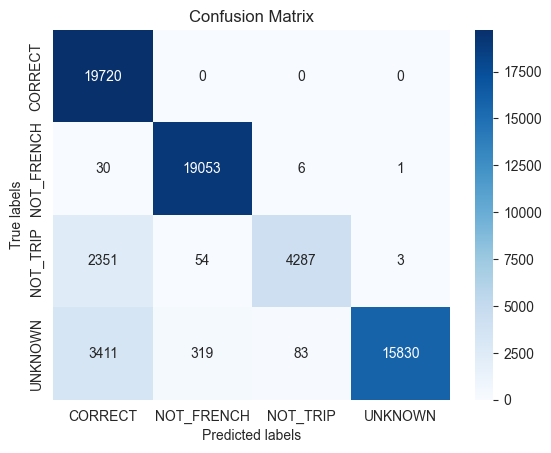

In [22]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

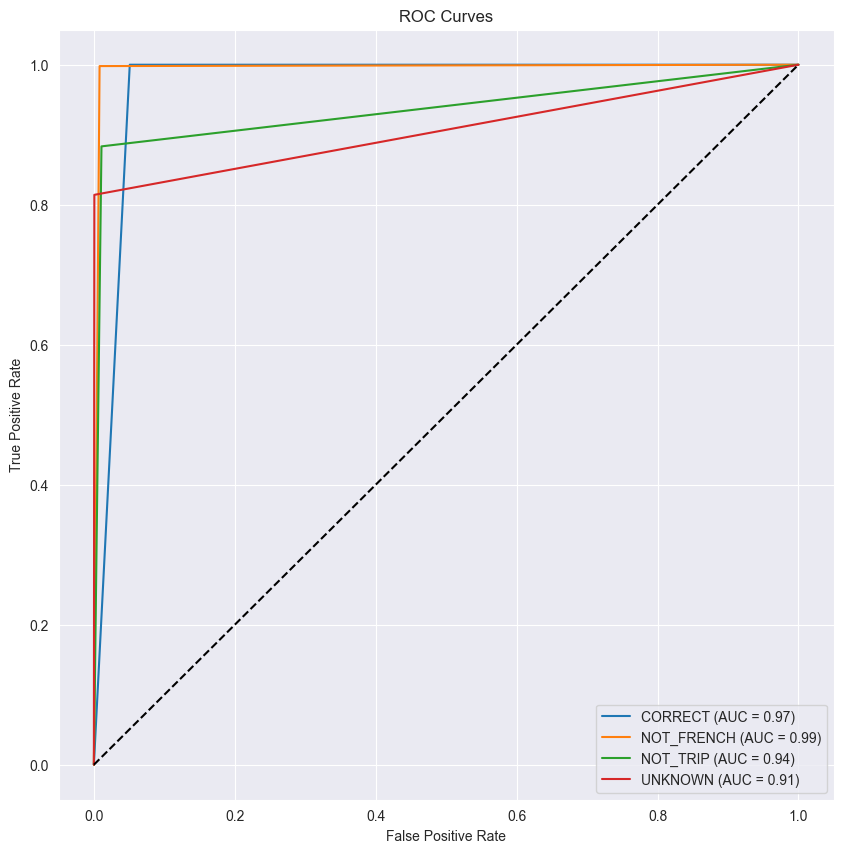

In [23]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [24]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 57.8%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 80.0%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 3.4%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 99.8%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 99.5%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 2.9%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 100.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 97.9%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 4.8%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 78.6%
 - NOT_FRENCH => 9.9%
 - NOT_TRIP => 5.5%
 - UNKNOWN => 0.0%

* Dirige moi vers Lyon depuis Saint-Étienn

# La performance du modèle semble équivalent à la version avec seulement les stops words. Cependant, le modèle semble plus serein sur les pourcentages de confiance pour chaque label (beaucoup plus de 100% pour le label à prédire) et de 0% pour les autres labels).

In [25]:
# print few predictions from test dataset where classifier failed
for i in range(len(y_test)):
    if (y_test.values[i] != y_pred[i]).any():
        print(X_test.values[i])
        print("True labels:", [id2label[i] for i, label in enumerate(y_test.values[i]) if label == 1])
        print("Predicted labels:", [id2label[i] for i, label in enumerate(y_pred[i]) if label == 1])
        print()

gajxzaknrs ycmyj zidy x
True labels: ['UNKNOWN']
Predicted labels: []

zqkv zkle qehpo htnixtpn
True labels: ['UNKNOWN']
Predicted labels: []

xsbazxgoxotyxe imyq vjjy e
True labels: ['UNKNOWN']
Predicted labels: []

dirigez vers ville marcilly tille depuis autre ville
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT', 'NOT_TRIP']

xcrqastetqugxx vsjb jncly
True labels: ['UNKNOWN']
Predicted labels: []

veux arriver place centrale st pol ternoise
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

nwjke xsyfztst o w jetgg
True labels: ['UNKNOWN']
Predicted labels: []

cherche moyen partir ambert
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

comment rendre thann saint jacques
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

q fhyqjohl nxwwhqib budzh
True labels: ['UNKNOWN']
Predicted labels: []

mfqacqjdufpzdtfvz cvoveaz
True labels: ['UNKNOWN']
Predicted labels: []

uvifqfv wacczd mnyucaetj
True labels: ['UNKNOWN']
Predicted labels: []

depart for the city 